In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [2]:
pd.options.display.max_columns = 500

In [3]:
train = pd.read_csv('../data/raw_2/application_train.csv')
test = pd.read_csv('../data/raw_2/application_test.csv')
sample_submission = pd.read_csv('../data/raw_2/sample_submission.csv')

In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
train.shape

(307511, 122)

# Домашнее задание №2

*Ниже описание для ДЗ №1*

Ваша задача изучить как различные преобразования влияют на модель и итоговый результат. 

1) Для удобства написать функцию, которая реализовала бы кросс-валидацию. Данная функция принимает на вход данные и другие аргументы на выше усмотрение, на выходе скор на кроссвалидации и его стандартное отклонение.

2) Сделать несколько различных моделей с различными признаками и способами обработки признаков.

    1. Например в первой модели будут использованы  непрерывные признаки   ['metro_km_walk', 'kremlin_km', 'full_sq'] с заполненными пропусками
    
    2. Во второй модели нормируйте признаки из первой модели (std=1, mean = 0). Изменился ли результат? 
    
    3. Во второй модели добавлены преобразованные различным образом категориальне признаки ['product_type' , 'sub_area' ] и т.д.
    
    4. В третьей добавлены datetime признаки 
    
    5. И так далее. Попробуйте реализовать различные гипотезы

3) Для каждой модели нужно сделать кросс-валидацию и засабмитить предсказание на тестовой выборке на кагл

4) Построить график зависимости Leader board score от score на кросс-валидации для всех 5 моделей. 

5) Написать отчет с выводами. 



P.S. Не забудьте про то, что вы можете делать модель для предсказания price_m2, а итоговый результат подсчитывается по price_doc

P.P.S.  Все преобразования, которые вы делаете нужно проделывать и с тестовой выборкой!

P.P.P.S. Можно использовать готовые функции и преобразования из sklearn.

In [6]:
columns = train.apply(lambda x: sum(x.isnull()), axis=0)
columns[columns > 0] 

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

In [7]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Функция для кроссвалидации

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from collections import namedtuple

In [9]:
def cross_validate_score(data, features, target):
    mse_list = []
    msle_list = []
    rmsle_list = []

    kf = KFold(n_splits=5, shuffle=True)

    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index, :]
        val_part = data.loc[val_index, :]

        model = LogisticRegression(class_weight = 'balanced')
        model.fit(X=train_part[features], y=train_part[target])
        val_prediction = model.predict(val_part[features])

        mse = mean_squared_error(val_prediction, val_part[target])
        mse_list.append(mse)
        
        msle = mean_squared_log_error(val_prediction, val_part[target])
        msle_list.append(msle)

        rmsle = math.sqrt(msle)
        rmsle_list.append(rmsle)

    Score = namedtuple('Score', ['mse_average', 'rmsle_average', 'msle_average', 'msle_std'])
        
    return Score(np.mean(mse_list), np.mean(rmsle_list), np.mean(msle_list), np.std(msle_list))

## Строим модели и валидируем

### Первая модель
В первой модели будут использованы  непрерывные признаки   [`AMT_CREDIT`, `AMT_ANNUITY`, `AMT_INCOME_TOTAL`] с заполненными пропусками.

In [10]:
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']
target = 'TARGET'

train_data_1 = train.copy()
train_data_1[features] = train_data_1[features].fillna(0)

test_data_1 = test.copy()
test_data_1[features] = test_data_1[features].fillna(0)

model1 = LogisticRegression(class_weight = 'balanced')
model1.fit(X=train_data_1[features], y=train_data_1[target])

sample_submission[target] = model1.predict(test_data_1[features]) 
sample_submission.to_csv('predict_1.csv', index=False)

In [11]:
cross_score_1 = cross_validate_score(train_data_1, features, target).rmsle_average
kaggle_score_1 = 0.55585

print('Model 1 (\'AMT_CREDIT\', \'AMT_ANNUITY\', \'AMT_INCOME_TOTAL\')')
print('Cross-validation: {0}\nKaggle: {1}'.format(cross_score_1, kaggle_score_1))

Model 1 ('AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL')
Cross-validation: 0.4782159146287201
Kaggle: 0.55585


### Вторая модель
Во второй модели будут использованы нормированные непрерывные признаки [`AMT_CREDIT`, `AMT_ANNUITY`, `AMT_INCOME_TOTAL`] с заполненными пропусками.

In [12]:
from sklearn import preprocessing

In [13]:
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']
target = 'TARGET'

mm_scaler = preprocessing.MinMaxScaler() # [0, 1]

train_data_2 = train.copy()
train_data_2[features] = mm_scaler.fit_transform(train_data_2[features].fillna(0))

test_data_2 = test.copy()
test_data_2[features] = mm_scaler.fit_transform(test_data_2[features].fillna(0))

model2 = LogisticRegression(class_weight = 'balanced')
model2.fit(X=train_data_2[features], y=train_data_2[target])

sample_submission[target] = model2.predict(test_data_2[features])
sample_submission.to_csv('predict_2.csv', index=False)

In [14]:
cross_score_2 = cross_validate_score(train_data_2, features, target).rmsle_average
kaggle_score_2 = 0.54383

print('Model 2 (\'AMT_CREDIT\', \'AMT_ANNUITY\', \'AMT_INCOME_TOTAL\')')
print('Cross-validation: {0}\nKaggle: {1}'.format(cross_score_2, kaggle_score_2))

Model 2 ('AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL')
Cross-validation: 0.521919504297736
Kaggle: 0.54383


### Третья модель
В третьей модели к второй модели добавлены преобразованные категориальный признак `NAME_FAMILY_STATUS`.

In [15]:
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS']
target = 'TARGET'

family_status = {
    'Married': 0,
    'Single / not married': 1,
    'Civil marriage': 2,
    'Widow': 3,
    'Separated': 4,
    'Unknown': 5
}

train_data_3 = train_data_2.copy()
train_data_3['NAME_FAMILY_STATUS'] = train_data_3['NAME_FAMILY_STATUS'].replace(family_status)

test_data_3 = test_data_2.copy()
test_data_3['NAME_FAMILY_STATUS'] = test_data_3['NAME_FAMILY_STATUS'].replace(family_status)

model3 = LogisticRegression(class_weight = 'balanced')
model3.fit(X=train_data_3[features], y=train_data_3[target])

sample_submission[target] = model3.predict(test_data_3[features])
sample_submission.to_csv('predict_3.csv', index=False)

In [16]:
cross_score_3 = cross_validate_score(train_data_3, features, target).rmsle_average
kaggle_score_3 = 0.54506

print('Model 3 (\'AMT_CREDIT\', \'AMT_ANNUITY\', \'AMT_INCOME_TOTAL\', \'NAME_FAMILY_STATUS\'')
print('Cross-validation: {0}\nKaggle: {1}'.format(cross_score_3, kaggle_score_3))

Model 3 ('AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS'
Cross-validation: 0.5199127382914293
Kaggle: 0.54506


### Четвёртая модель
В чётвертой модели к третьей модели добавлен признак `CODE_GENDER`.

In [17]:
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER']
target = 'TARGET'

gender = {
    'M': 0,
    'F': 1,
    'XNA': 2
}

train_data_4 = train_data_3.copy()
train_data_4['CODE_GENDER'] = train_data_4['CODE_GENDER'].replace(gender)

test_data_4 = test_data_3.copy()
test_data_4['CODE_GENDER'] = test_data_4['CODE_GENDER'].replace(gender)

model4 = LogisticRegression(class_weight = 'balanced')
model4.fit(X=train_data_4[features], y=train_data_4[target])

sample_submission[target] = model4.predict(test_data_4[features])
sample_submission.to_csv('predict_4.csv', index=False)

In [18]:
cross_score_4 = cross_validate_score(train_data_4, features, target).rmsle_average
kaggle_score_4 = 0.56463

print('Model 4 (\'AMT_CREDIT\', \'AMT_ANNUITY\', \'AMT_INCOME_TOTAL\', \'NAME_FAMILY_STATUS\', \'CODE_GENDER\'')
print('Cross-validation: {0}\nKaggle: {1}'.format(cross_score_4, kaggle_score_4))

Model 4 ('AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER'
Cross-validation: 0.4278431770397065
Kaggle: 0.56463


### Пятая модель
В пятой модели к четвертой модели добавлен признак `DAYS_EMPLOYED`.

In [19]:
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER', 'DAYS_EMPLOYED']
target = 'TARGET'

train_data_5 = train_data_4.copy()
train_data_5['DAYS_EMPLOYED'] = train_data_5['DAYS_EMPLOYED'].fillna(0)

test_data_5 = test_data_4.copy()
test_data_5['DAYS_EMPLOYED'] = test_data_5['DAYS_EMPLOYED'].fillna(0)

model5 = LogisticRegression(class_weight = 'balanced')
model5.fit(X=train_data_5[features], y=train_data_5[target])

sample_submission[target] = model5.predict(test_data_5[features])
sample_submission.to_csv('predict_5.csv', index=False)

In [20]:
cross_score_5 = cross_validate_score(train_data_5, features, target).rmsle_average
kaggle_score_5 = 0.53413

print('Model 5 (\'AMT_CREDIT\', \'AMT_ANNUITY\', \'AMT_INCOME_TOTAL\', \'NAME_FAMILY_STATUS\', \'CODE_GENDER\', \'DAYS_EMPLOYED\'')
print('Cross-validation: {0}\nKaggle: {1}'.format(cross_score_5, kaggle_score_5))

Model 5 ('AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER', 'DAYS_EMPLOYED'
Cross-validation: 0.6037329277056471
Kaggle: 0.53413


## Сравнение и график

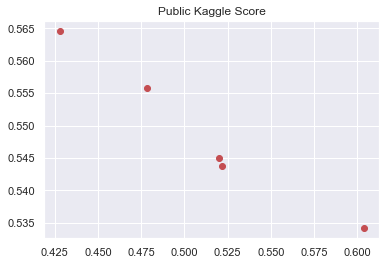

In [21]:
x = [cross_score_1, cross_score_2, cross_score_3, cross_score_4, cross_score_5]
y = [kaggle_score_1, kaggle_score_2, kaggle_score_3, kaggle_score_4, kaggle_score_5]

plt.title('Public Kaggle Score')
plt.plot(x, y, 'ro')
plt.show()